Badanie cen mieszkań w Polsce


Jed:

Pliki pochodzą z źródła: https://dane.gov.pl/pl/dataset/726,panstwowy-rejestr-granic-i-powierzchni-jednostek-podziaow-terytorialnych-kraju/resource/29515/table 
 Dane z jednostkami administracyjnymi są w formacie shapefile - shp
 
 
Df:

GUS: Bank Danych Lokalnych

https://bdl.stat.gov.pl/bdl/start

Zbadajmy cen mieszkań:

Mediana cen za 1 m2 lokali mieszkalnych sprzedanych w ramach transakcji rynkowych

In [1]:

import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt

<Axes: >

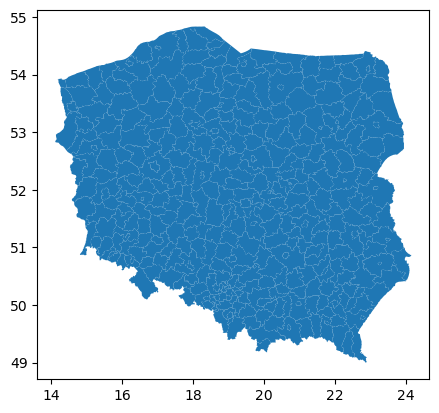

In [2]:
jed = geopandas.read_file(r'C:\Users\admin\Desktop\Python\Zastosowanie Pythona\jednostkiMapowanie\A02_Granice_powiatow.shp', encoding='utf8')
jed.plot()

In [3]:
jed.crs # crs 4258 dla europy

<Geographic 2D CRS: EPSG:4258>
Name: ETRS89
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Moldova; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-16.1, 32.88, 40.18, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
jed.head()

,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,...,ID_BUFOR_1,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,Shape_Leng,Shape_Area,REGON,geometry
0,POW,39572.0,0207,powiat kamiennogórski,None,13410,2023-05-23,None,2012-09-26,None,...,0,2218911,0.0,None,0.0,0.0,1.653938,0.050410,23082130000000,"POLYGON ((16.04045 50.91341, 16.04260 50.91335..."
1,POW,10557.0,3261,powiat Koszalin,None,13423,2022-12-20,None,2012-09-26,None,...,0,2218940,0.0,None,0.0,0.0,0.942860,0.014533,33092085400000,"POLYGON ((16.18668 54.27466, 16.18666 54.27462..."
2,POW,102477.0,0220,powiat trzebnicki,None,13410,2024-02-20,None,2012-09-26,None,...,0,2219141,0.0,None,0.0,0.0,2.576357,0.132278,93193478500000,"POLYGON ((16.89344 51.57920, 16.89531 51.57853..."
3,POW,72240.0,3011,powiat kościański,None,13417,2022-02-01,None,2012-09-26,None,...,0,2219151,0.0,None,0.0,0.0,2.032859,0.094640,41105049700000,"POLYGON ((16.75689 52.20866, 16.75709 52.20852..."
4,POW,73645.0,3014,powiat międzychodzki,None,13417,2012-09-26,None,2012-09-26,None,...,0,2219154,0.0,None,0.0,0.0,1.979755,0.097683,21096734300000,"POLYGON ((15.96550 52.75301, 15.96835 52.75267..."


In [5]:
print(jed.shape)
print(jed.columns)
len(jed['JPT_KOD_JE'].unique()) # ten jpt kod , który wyszuka unique i separuje

(380, 35)
Index(['JPT_SJR_KO', 'JPT_POWIER', 'JPT_KOD_JE', 'JPT_NAZWA_', 'JPT_ORGAN_',
       'JPT_JOR_ID', 'WERSJA_OD', 'WERSJA_DO', 'WAZNY_OD', 'WAZNY_DO',
       'JPT_KOD__1', 'JPT_NAZWA1', 'JPT_ORGAN1', 'JPT_WAZNA_', 'ID_BUFORA_',
       'ID_BUFORA1', 'ID_TECHNIC', 'IIP_PRZEST', 'IIP_IDENTY', 'IIP_WERSJA',
       'JPT_KJ_IIP', 'JPT_KJ_I_1', 'JPT_KJ_I_2', 'JPT_OPIS', 'JPT_SPS_KO',
       'ID_BUFOR_1', 'JPT_ID', 'JPT_POWI_1', 'JPT_KJ_I_3', 'JPT_GEOMET',
       'JPT_GEOM_1', 'Shape_Leng', 'Shape_Area', 'REGON', 'geometry'],
      dtype='object')


380

GUS: Bank Danych Lokalnych

https://bdl.stat.gov.pl/bdl/start

Zbadajmy cen mieszkań:

Mediana cen za 1 m2 lokali mieszkalnych sprzedanych w ramach transakcji rynkowych

In [6]:
df=pd.read_csv(r'C:\Users\admin\Desktop\Python\Zastosowanie Pythona\jednostkiMapowanie\RYNE_3787_CTAB_20240501134451.csv', sep=';')

In [7]:
df

,Kod,Nazwa,ogółem;ogółem;2022;[zł],Unnamed: 3
0,0,POLSKA,6617,NaN
1,200000,DOLNOŚLĄSKIE,6936,NaN
2,201000,Powiat bolesławiecki,5283,NaN
3,202000,Powiat dzierżoniowski,2934,NaN
4,203000,Powiat głogowski,4592,NaN
...,...,...,...,...
391,3216000,Powiat świdwiński,2734,NaN
392,3217000,Powiat wałecki,3931,NaN
393,3218000,Powiat łobeski,2186,NaN
394,3262000,Powiat m. Szczecin,7505,NaN


In [8]:
df=df.rename(columns={'ogółem;ogółem;2022;[zł]':'mediana cen'})

Według stanu na 1 stycznia 2022 r. podział administracyjny Polski obejmował: 16 województw, 314 powiatów i 66 miast na prawach powiatu, 2477 gmin (w tym 302 gminy miejskie, 662 gminy miejsko-wiejskie i 1513 gmin wiejskich).

https://stat.gov.pl/statystyka-regionalna/jednostki-terytorialne/podzial-administracyjny-polski/

In [9]:
len(df['Kod'].unique())

396

In [10]:
len(jed['JPT_KOD_JE'].unique())

380

In [11]:
jed['JPT_KOD_JE'].unique()

array(['0207', '3261', '0220', '3011', '3014', '3210', '2815', '3024',
       '2610', '2462', '2464', '2806', '1814', '1815', '2261', '2262',
       '2404', '1437', '2013', '2014', '2063', '2414', '2416', '2202',
       '2206', '2211', '1415', '1420', '1215', '1427', '1219', '1263',
       '1401', '1821', '1864', '1017', '1203', '1205', '1208', '0616',
       '1001', '1009', '0464', '0801', '0265', '0401', '0402', '0607',
       '3215', '0809', '0411', '3061', '0201', '2810', '2811', '3009',
       '3206', '2861', '3005', '3016', '2801', '3007', '2465', '1801',
       '2401', '2403', '1438', '1463', '1602', '2212', '1216', '1430',
       '1262', '1405', '1408', '2005', '1061', '1063', '1204', '0461',
       '0618', '0803', '1015', '0606', '3216', '0209', '0213', '0218',
       '0414', '0417', '3030', '3063', '3064', '3010', '3205', '3006',
       '3021', '3026', '2606', '2612', '2661', '2802', '2417', '2461',
       '2804', '1611', '2471', '2472', '1810', '1813', '2263', '2405',
      

In [12]:
df['Kod'].unique()

array([      0,  200000,  201000,  202000,  203000,  204000,  205000,
        206000,  207000,  208000,  209000,  210000,  211000,  212000,
        213000,  214000,  215000,  216000,  217000,  218000,  219000,
        220000,  221000,  222000,  223000,  224000,  225000,  226000,
        261000,  262000,  264000,  265000,  400000,  401000,  402000,
        403000,  404000,  405000,  406000,  407000,  408000,  409000,
        410000,  411000,  412000,  413000,  414000,  415000,  416000,
        417000,  418000,  419000,  461000,  462000,  463000,  464000,
        600000,  601000,  602000,  603000,  604000,  605000,  606000,
        607000,  608000,  609000,  610000,  611000,  612000,  613000,
        614000,  615000,  616000,  617000,  618000,  619000,  620000,
        661000,  662000,  663000,  664000,  800000,  801000,  802000,
        803000,  804000,  805000,  806000,  807000,  808000,  809000,
        810000,  811000,  812000,  861000,  862000, 1000000, 1001000,
       1002000, 1003

Wygląda na to, że format kodów dla powiatów różni się w naszych tabelkach. Czym się różni i jak 
mażna tabelki merge?

In [13]:
df[df['Kod']==1815000]


,Kod,Nazwa,mediana cen,Unnamed: 3
215,1815000,Powiat ropczycko-sędziszowski,4871,NaN


In [14]:
jed[jed['JPT_KOD_JE']=='1815']

,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,...,ID_BUFOR_1,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,Shape_Leng,Shape_Area,REGON,geometry
13,POW,54832.0,1815,powiat ropczycko-sędziszowski,None,13415,2024-02-27,None,2012-09-26,None,...,0,2220253,0.0,None,0.0,0.0,1.774701,0.068826,69058143600000,"POLYGON ((21.61810 50.20043, 21.61836 50.20041..."


In [15]:
jed[jed['JPT_KOD_JE']=='0403']

,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,...,ID_BUFOR_1,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,Shape_Leng,Shape_Area,REGON,geometry
274,POW,139403.0,0403,powiat bydgoski,None,13424,2023-03-03,None,2012-09-26,None,...,0,2222477,0.0,None,0.0,0.0,4.674492,0.187406,09235062000000,"POLYGON ((17.91433 53.44401, 17.91507 53.44364..."


In [16]:
df[df['Kod']==403000]

,Kod,Nazwa,mediana cen,Unnamed: 3
35,403000,Powiat bydgoski,5324,NaN


Widać że różnią się zerami przed i po kodzie, możemy więc napisać kod , który ten problem usunie

In [17]:
def correct(row):
    if row['JPT_KOD_JE'][0]=='0':
        return row['JPT_KOD_JE'][1:]+'000'
    else:
        return row['JPT_KOD_JE']+'000'

In [18]:
jed['Kod']=jed.apply(lambda row: correct(row), axis=1)

In [19]:
jed['Kod']

0       207000
1      3261000
2       220000
3      3011000
4      3014000
        ...   
375     261000
376     612000
377     613000
378    3214000
379    3217000
Name: Kod, Length: 380, dtype: object

In [20]:
df['Kod']=df['Kod'].astype(str)

In [21]:
df2=jed.merge(df, on='Kod') 

In [22]:
df2

,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,...,JPT_GEOMET,JPT_GEOM_1,Shape_Leng,Shape_Area,REGON,geometry,Kod,Nazwa,mediana cen,Unnamed: 3
0,POW,39572.0,0207,powiat kamiennogórski,None,13410,2023-05-23,None,2012-09-26,None,...,0.0,0.0,1.653938,0.050410,23082130000000,"POLYGON ((16.04045 50.91341, 16.04260 50.91335...",207000,Powiat kamiennogórski,2806,NaN
1,POW,102477.0,0220,powiat trzebnicki,None,13410,2024-02-20,None,2012-09-26,None,...,0.0,0.0,2.576357,0.132278,93193478500000,"POLYGON ((16.89344 51.57920, 16.89531 51.57853...",220000,Powiat trzebnicki,5973,NaN
2,POW,72240.0,3011,powiat kościański,None,13417,2022-02-01,None,2012-09-26,None,...,0.0,0.0,2.032859,0.094640,41105049700000,"POLYGON ((16.75689 52.20866, 16.75709 52.20852...",3011000,Powiat kościański,4290,NaN
3,POW,73645.0,3014,powiat międzychodzki,None,13417,2012-09-26,None,2012-09-26,None,...,0.0,0.0,1.979755,0.097683,21096734300000,"POLYGON ((15.96550 52.75301, 15.96835 52.75267...",3014000,Powiat międzychodzki,3891,NaN
4,POW,118232.0,3210,powiat myśliborski,None,13423,2024-02-27,None,2012-09-26,None,...,0.0,0.0,3.949859,0.157778,21096732000000,"POLYGON ((15.21028 53.08008, 15.21245 53.07901...",3210000,Powiat myśliborski,4306,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,POW,10929.0,0261,powiat Jelenia Góra,None,13410,2022-08-10,None,2012-09-26,None,...,0.0,0.0,1.151349,0.013957,23082152300000,"POLYGON ((15.77177 50.93023, 15.77182 50.93001...",261000,Powiat m. Jelenia Góra,5276,NaN
375,POW,81050.0,0612,powiat opolski,None,13411,2012-09-26,None,2012-09-26,None,...,0.0,0.0,2.208714,0.104091,43101943100000,"POLYGON ((21.92838 51.27683, 21.92844 51.27678...",612000,Powiat opolski,4745,NaN
376,POW,95217.0,0613,powiat parczewski,None,13411,2012-09-26,None,2012-09-26,None,...,0.0,0.0,2.422865,0.123568,03023736800000,"POLYGON ((22.98910 51.77095, 22.98944 51.77085...",613000,Powiat parczewski,3944,NaN
377,POW,152332.0,3214,powiat stargardzki,None,13423,2024-02-27,None,2012-09-26,None,...,0.0,0.0,4.004265,0.205550,81168421000000,"POLYGON ((15.39449 53.53128, 15.39484 53.53074...",3214000,Powiat stargardzki,5050,NaN


<Axes: >

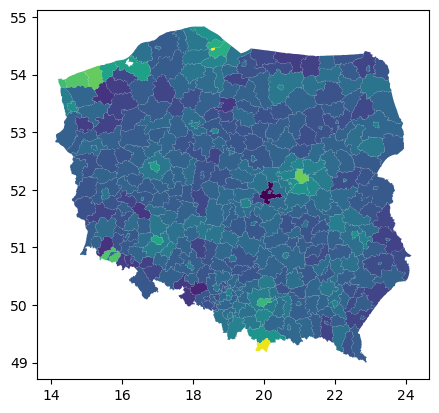

In [23]:
df2.plot(column='mediana cen')

Zgubiliśmy jeden powiat :(
sprawdzamy dlaczego nie mamy na górze, jest coś białego

In [24]:
for i in jed['Kod'].unique():
  if i not in df2['Kod'].unique():
    print(i)

3261000


In [25]:
jed[jed['Kod']=='3261000']

,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,Shape_Leng,Shape_Area,REGON,geometry,Kod
1,POW,10557.0,3261,powiat Koszalin,None,13423,2022-12-20,None,2012-09-26,None,...,2218940,0.0,None,0.0,0.0,0.94286,0.014533,33092085400000,"POLYGON ((16.18668 54.27466, 16.18666 54.27462...",3261000


In [26]:
df[df['Kod']=='3261000']

,Kod,Nazwa,mediana cen,Unnamed: 3


In [27]:
df[df['Nazwa'].str.contains('oszali')==True]

,Kod,Nazwa,mediana cen,Unnamed: 3
384,3209000,Powiat koszaliński,8544,NaN


In [28]:
jed[jed['JPT_NAZWA_'].str.contains('oszali')==True]

,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,Shape_Leng,Shape_Area,REGON,geometry,Kod
1,POW,10557.0,3261,powiat Koszalin,None,13423,2022-12-20,None,2012-09-26,None,...,2218940,0.0,None,0.0,0.0,0.942860,0.014533,33092085400000,"POLYGON ((16.18668 54.27466, 16.18666 54.27462...",3261000
339,POW,164846.0,3209,powiat koszaliński,None,13423,2023-09-20,None,2012-09-26,None,...,2219164,0.0,None,0.0,0.0,5.051858,0.226467,33092085400000,"POLYGON ((16.28119 54.33204, 16.28346 54.33179...",3209000


In [29]:
df2[df2['Nazwa'].str.contains('oszali')==True]

,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,...,JPT_GEOMET,JPT_GEOM_1,Shape_Leng,Shape_Area,REGON,geometry,Kod,Nazwa,mediana cen,Unnamed: 3
338,POW,164846.0,3209,powiat koszaliński,None,13423,2023-09-20,None,2012-09-26,None,...,0.0,0.0,5.051858,0.226467,33092085400000,"POLYGON ((16.28119 54.33204, 16.28346 54.33179...",3209000,Powiat koszaliński,8544,NaN


Wygląda na to, że dla Koszalina nie mamy danych!!!

In [31]:
df2[['JPT_NAZWA_', 'Nazwa']]

,JPT_NAZWA_,Nazwa
0,powiat kamiennogórski,Powiat kamiennogórski
1,powiat trzebnicki,Powiat trzebnicki
2,powiat kościański,Powiat kościański
3,powiat międzychodzki,Powiat międzychodzki
4,powiat myśliborski,Powiat myśliborski
...,...,...
374,powiat Jelenia Góra,Powiat m. Jelenia Góra
375,powiat opolski,Powiat opolski
376,powiat parczewski,Powiat parczewski
377,powiat stargardzki,Powiat stargardzki


<Axes: >

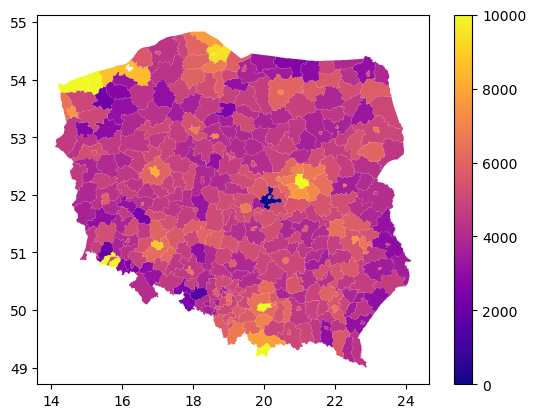

In [32]:
fig, ax = plt.subplots(1, 1)

df2.plot(column='mediana cen', ax=ax, legend=True, cmap='plasma', vmax=10000)
